In [1]:
##load libraries
import os
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sbn
from random import randrange, uniform
from fancyimpute import KNN
from geopy.distance import great_circle
import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
#setworkingdirectory
os.chdir("C:/Users/HARSHAVARDHAN REDDY/r and yt")

In [3]:
#loan train and test data
cab_train=pd.read_csv("cab.csv")
cab_train.head()
cab_train.pickup_datetime=pd.to_datetime(cab_train['pickup_datetime'],errors='coerce')
cab_train.fare_amount=pd.to_numeric(cab_train['fare_amount'],errors='coerce')
cab_train.passenger_count=cab_train['passenger_count'].astype(int,errors='ignore')

In [4]:
##exploratory analysis
##cab_train.describe()
cab_train.isna().sum()
cab_train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [5]:
cab_train.dtypes
missing_val=cab_train.isna().sum()
missing_val=pd.DataFrame(missing_val)
missing_val=missing_val.reset_index()
missing_val=missing_val.rename(columns={'index':"variables",0:'missing_percentage'})
missing_val['missing_percentage']=(missing_val['missing_percentage']/len(cab_train))*100
missing_val=missing_val.sort_values('missing_percentage',ascending=False).reset_index(drop=True)
missing_val.to_csv("Miising_perc.csv", index = False)
missing_val

,variables,missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.155598
2,pickup_datetime,0.006224
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [6]:
###cab_train['passenger_count'].loc[770]=ny.nan
#@imputing passenger count with mean
##cab_train['fare_amount'].loc[987]=ny.nan
cab_train.dropna(inplace=True)

In [7]:
#cab_train['passenger_count']=cab_train['passenger_count'].fillna(cab_train['passenger_count'].mean())
#val=2.62498
#val=4 original
##cab_train['fare_amount']=cab_train['fare_amount'].fillna(cab_train['fare_amount'].mean())
##cab_train['fare_amount'].loc[987]


In [8]:
##cab_train['passenger_count']=cab_train['passenger_count'].fillna(cab_train['passenger_count'].median())
#val=1.0
##cab_train['fare_amount']=cab_train['fare_amount'].fillna(cab_train["fare_amount"].median())
##8.5
#cab_train.isna().sum()

In [9]:
#cab_knn=cab_train.drop('pickup_datetime',axis=1)
#cab_knn = pd.DataFrame(KNN(k = 3).fit_transform(cab_knn),columns=cab_knn.columns)


In [10]:
##cab_knn['fare_amount'].loc[987]
##val=1.4319
#cab_knn['pickup_datetime']=cab_train['pickup_datetime']
#cab_train=cab_knn
#cab_train.isna().sum()

In [11]:
#cab_train.dropna(inplace=True)

In [12]:
cab_train.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
cab_train['dayofweek']=cab_train['pickup_datetime'].apply(lambda time:time.weekday())
cab_train['month']=cab_train['pickup_datetime'].apply(lambda time:time.month)
def hourmin(time):
    t=datetime.time(0,30,0)
    if(time.minute>=t.minute):
        hr=time.hour+1
    else:
        hr=time.hour
    return hr

cab_train['hour']=cab_train['pickup_datetime'].apply(lambda time:hourmin(time))
def hour24(hour):
    if(hour==24):
        hr=0
    else:
        hr=hour
    return hr
      
cab_train['hour']=cab_train['hour'].apply(lambda hour:hour24(hour))
cab_train['year']=cab_train['pickup_datetime'].apply(lambda time:time.year)
cab_train['day']=cab_train['pickup_datetime'].apply(lambda time:time.day)
def fun(day):
    if(day>5):
        return "weekend"
    else:
        return "weekday"
    
cab_train['weekend/weekday']=cab_train['dayofweek'].apply(lambda days:fun(days))


In [14]:
cab_train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dayofweek,month,hour,year,day,weekend/weekday
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,0,6,17,2009,15,weekday
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,1,1,17,2010,5,weekday
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,3,8,1,2011,18,weekday
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,5,4,5,2012,21,weekday
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1,3,8,2010,9,weekday
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,3,1,10,2011,6,weekday
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0,1,11,21,2012,20,weekday
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2,1,17,2012,4,weekday
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2,9,1,2009,2,weekday
10,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1.0,6,4,8,2012,8,weekend


In [15]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dayofweek,month,hour,year,day
count,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000
mean,15.030453,-72.464352,39.915577,-72.463909,39.898671,2.623272,3.034155,6.262542,13.431190,2011.729138,15.672589
std,431.213944,10.573594,6.829028,10.570256,6.186375,60.892140,1.968748,3.447766,6.688067,1.864090,8.683416
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,0.000000,1.000000,0.000000,2009.000000,1.000000
25%,6.000000,-73.992144,40.734935,-73.991182,40.734647,1.000000,1.000000,3.000000,9.000000,2010.000000,8.000000
50%,8.500000,-73.981691,40.752603,-73.980168,40.753549,1.000000,3.000000,6.000000,14.000000,2012.000000,16.000000
75%,12.500000,-73.966817,40.767353,-73.963644,40.768005,2.000000,5.000000,9.000000,19.000000,2013.000000,23.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,6.000000,12.000000,23.000000,2015.000000,31.000000


In [16]:
cab_train=cab_train[cab_train.pickup_latitude<90]
cab_train=cab_train[cab_train.pickup_latitude!=0]
cab_train=cab_train[cab_train.pickup_longitude!=0]
cab_train=cab_train[cab_train.dropoff_latitude!=0]
cab_train=cab_train[cab_train.dropoff_longitude!=0]
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dayofweek,month,hour,year,day
count,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000
mean,15.099641,-73.911476,40.689674,-73.906288,40.687621,2.626245,3.033395,6.265245,13.436179,2011.732648,15.671732
std,435.662004,2.659050,2.613305,2.710836,2.632399,61.490724,1.969783,3.447362,6.677097,1.866242,8.682513
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,0.000000,1.000000,0.000000,2009.000000,1.000000
25%,6.000000,-73.992375,40.736530,-73.991372,40.736261,1.000000,1.000000,3.000000,9.000000,2010.000000,8.000000
50%,8.500000,-73.982049,40.753293,-73.980558,40.754195,1.000000,3.000000,6.000000,14.000000,2012.000000,16.000000
75%,12.500000,-73.968075,40.767799,-73.965370,40.768305,2.000000,5.000000,9.000000,19.000000,2013.000000,23.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,5345.000000,6.000000,12.000000,23.000000,2015.000000,31.000000


In [17]:
cab_train['distance']=cab_train.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).km,axis=1)

In [18]:

cab_train=cab_train[cab_train.fare_amount>0]
cab_train=cab_train[cab_train.distance>0]
cab_train=cab_train[cab_train.distance<1000]
cab_train=cab_train[cab_train.fare_amount<1000]
cab_train=cab_train[cab_train.passenger_count>=1]
cab_train=cab_train[cab_train.passenger_count<8]
cab_train['passenger_count']=cab_train['passenger_count'].astype(int ,errors='ignore')
cab_train.dtypes
cab_train=cab_train.drop('pickup_datetime',axis=1)

In [19]:
cab_train.describe()
cab_train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dayofweek,month,hour,year,day,weekend/weekday,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,6,17,2009,15,weekday,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,1,17,2010,5,weekday,8.450146
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,1,2011,18,weekday,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,4,5,2012,21,weekday,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1,3,8,2010,9,weekday,1.999160
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,3,1,10,2011,6,weekday,3.787244
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,1,11,21,2012,20,weekday,1.555809
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2,1,17,2012,4,weekday,4.155450
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2,9,1,2009,2,weekday,2.849631
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1,6,4,8,2012,8,weekend,1.374579


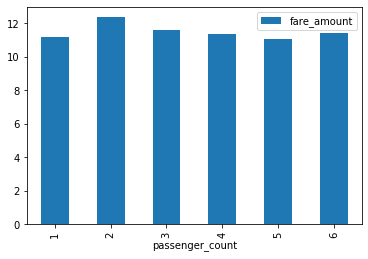

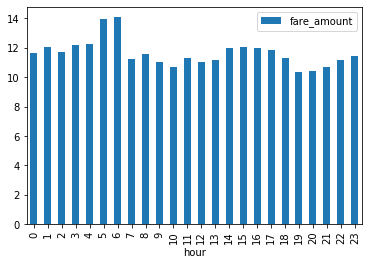

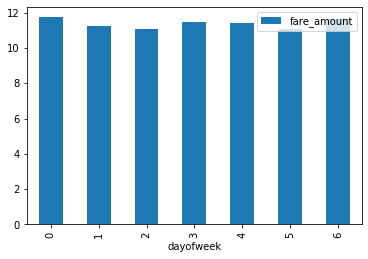

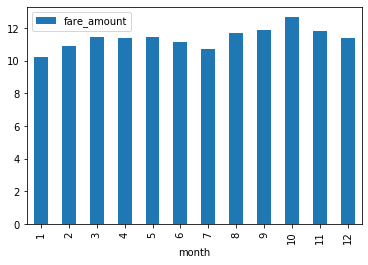

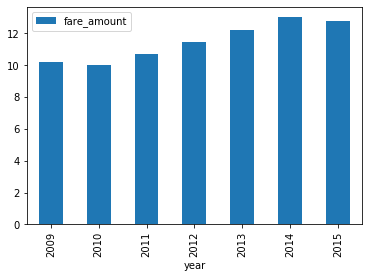

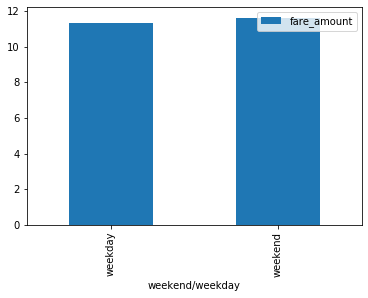

In [20]:

pc=pd.DataFrame(cab_train.groupby('passenger_count').fare_amount.mean())
pc.plot.bar()
hour=pd.DataFrame(cab_train.groupby('hour').fare_amount.mean())
hour.plot.bar()
dayofweek=pd.DataFrame(cab_train.groupby('dayofweek').fare_amount.mean())
dayofweek.plot.bar()
month=pd.DataFrame(cab_train.groupby('month').fare_amount.mean())
month.plot.bar()
year=pd.DataFrame(cab_train.groupby('year').fare_amount.mean())
year.plot.bar()
weekend=pd.DataFrame(cab_train.groupby('weekend/weekday').fare_amount.mean())
weekend.plot.bar()

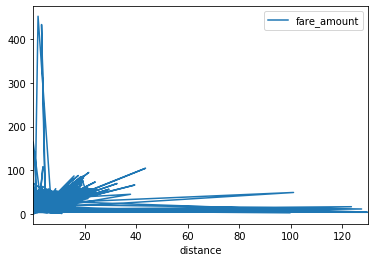

In [21]:
cab_train.plot(x='distance',y='fare_amount')

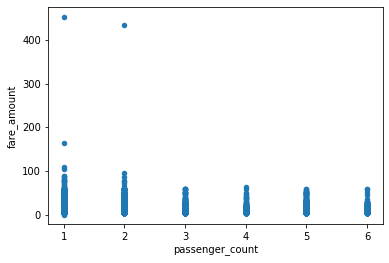

In [22]:
cab_train.plot.scatter(x='passenger_count',y='fare_amount')

In [23]:
cab_train['hour'].value_counts()

20    968
19    962
21    921
18    844
23    836
22    829
15    784
12    781
14    736
13    728
10    714
8     697
9     694
17    678
0     668
16    659
11    657
1     494
7     466
2     394
3     295
4     255
6     214
5     151
Name: hour, dtype: int64

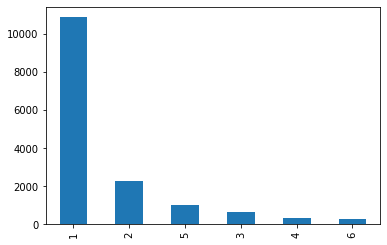

In [24]:
cab_train['passenger_count'].value_counts().plot.bar()

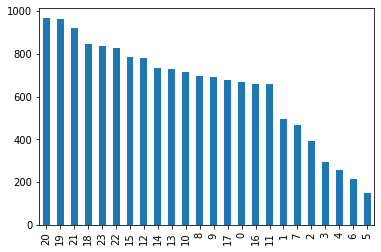

In [25]:
cab_train['hour'].value_counts().plot.bar()

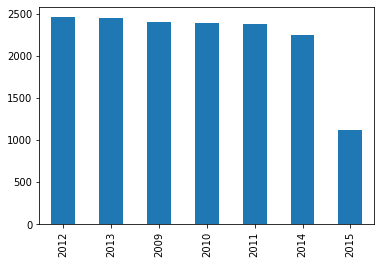

In [26]:
cab_train['year'].value_counts().plot.bar()

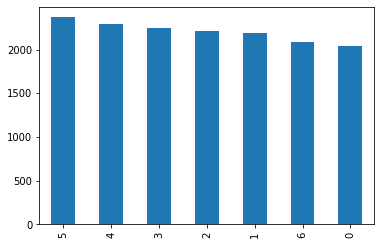

In [27]:
cab_train['dayofweek'].value_counts().plot.bar()

16    558
10    554
8     553
7     552
21    548
22    540
24    530
12    526
20    526
13    523
9     520
23    516
6     515
11    512
2     512
19    511
15    508
25    507
28    497
27    490
18    488
17    485
1     482
5     473
4     468
3     465
14    463
26    454
30    433
29    417
31    299
Name: day, dtype: int64

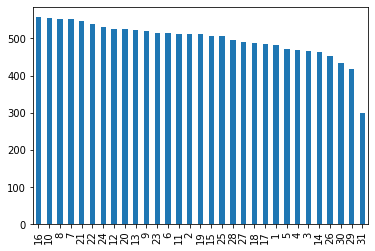

In [28]:
cab_train['day'].value_counts().plot.bar()
cab_train['day'].value_counts()

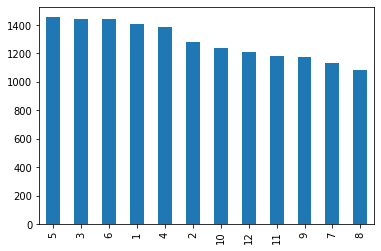

In [29]:
cab_train['month'].value_counts().plot.bar()

In [30]:
#vc=cab_train['hour'].value_counts()
#def density(hour):
   # if (vc[hour]>800):
        #return "high"
   # elif (vc[hour]>500):
        #return "mid"
    #else :
        #return "low"
    
#cab_train['cabdemandhours']=cab_train['hour'].apply(lambda hour:density(hour))
#cab_train

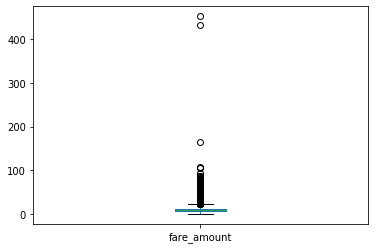

In [31]:
#outlier Analysis
cab_train['fare_amount'].plot.box()




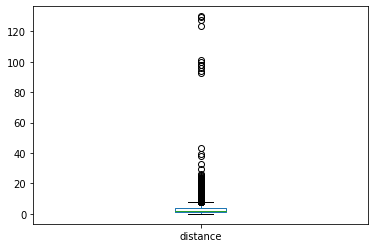

In [32]:
cab_train['distance'].plot.box()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a0e1cb5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0e1cb5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0e1cb57f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a0e1cc3940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a0e1cc3c88>],
 'means': []}

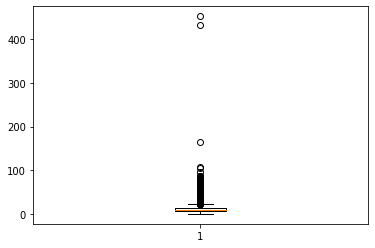

In [33]:
plt.boxplot(cab_train[cab_train['fare_amount']<1000]['fare_amount'])

In [34]:
#outlier removal
cnames=['fare_amount','distance']

In [35]:
for i in cnames:
    print(i)
    q25,q75=ny.percentile(cab_train.loc[:,i],[25,75])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    print(min)
    print(max)
    cab_train=cab_train.drop(cab_train[cab_train.loc[:,i]<min].index)
    cab_train=cab_train.drop(cab_train[cab_train.loc[:,i]>max].index)

fare_amount
-3.75
22.25
distance
-1.9304385279135303
6.473163944219252


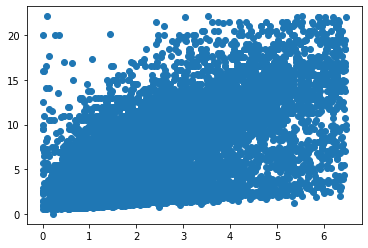

In [36]:
#ax=cab_train.plot(x='distance',y='fare_amount')
y=cab_train['fare_amount']/cab_train['passenger_count']
x=cab_train['distance']
plt.scatter(x,y)
plt.show()

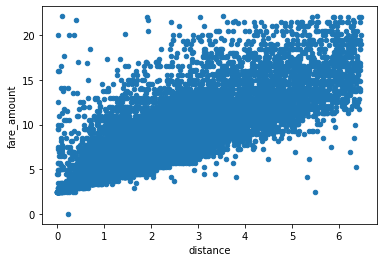

In [37]:
cab_train.plot.scatter(x='distance',y='fare_amount')

In [38]:
#correlation analysis
correldf=cab_train.drop(['month','year','hour','day','dayofweek','passenger_count','weekend/weekday'],axis=1)
correldf.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
distance             float64
dtype: object

In [39]:
cab_train['dayofweek']=cab_train["dayofweek"].astype('category')
cab_train['month']=cab_train["month"].astype('category')
cab_train['year']=cab_train["year"].astype('category')
cab_train['hour']=cab_train["hour"].astype('category')
cab_train['day']=cab_train["day"].astype('category')
cab_train['passenger_count']=cab_train['passenger_count'].astype('category')
cab_train['weekend/weekday']=cab_train['weekend/weekday'].astype('category')
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13452 entries, 0 to 16065
Data columns (total 13 columns):
fare_amount          13452 non-null float64
pickup_longitude     13452 non-null float64
pickup_latitude      13452 non-null float64
dropoff_longitude    13452 non-null float64
dropoff_latitude     13452 non-null float64
passenger_count      13452 non-null category
dayofweek            13452 non-null category
month                13452 non-null category
hour                 13452 non-null category
year                 13452 non-null category
day                  13452 non-null category
weekend/weekday      13452 non-null category
distance             13452 non-null float64
dtypes: category(7), float64(6)
memory usage: 831.4 KB


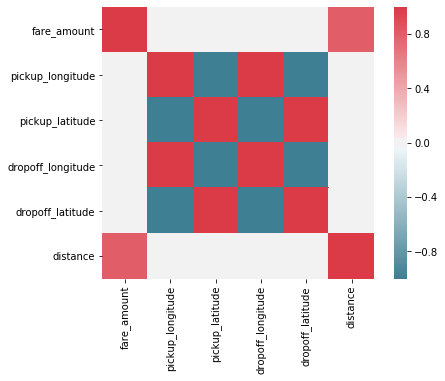

In [40]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = correldf.corr()

#Plot using seaborn library
sbn.heatmap(corr, mask=ny.zeros_like(corr, dtype=ny.bool), cmap=sbn.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [41]:
cab_train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dayofweek,month,hour,year,day,weekend/weekday,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,6,17,2009,15,weekday,1.030765
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,1,2011,18,weekday,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,4,5,2012,21,weekday,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1,3,8,2010,9,weekday,1.999160
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,3,1,10,2011,6,weekday,3.787244
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,1,11,21,2012,20,weekday,1.555809
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2,1,17,2012,4,weekday,4.155450
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2,9,1,2009,2,weekday,2.849631
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1,6,4,8,2012,8,weekend,1.374579
12,4.1,-73.991601,40.744712,-73.983081,40.744682,2,4,11,1,2009,6,weekday,0.717769


In [42]:
#cab_train=cab_train.drop('pickup_datetime',axis=1)
cab_train=cab_train.drop('pickup_longitude',axis=1)
cab_train=cab_train.drop('pickup_latitude',axis=1)
cab_train=cab_train.drop('dropoff_latitude',axis=1)
cab_train=cab_train.drop('dropoff_longitude',axis=1)
cab_train=cab_train.drop('weekend/weekday',axis=1)
cab_train=cab_train.drop('dayofweek',axis=1)
cab_train=cab_train.drop('day',axis=1)
#cab_train=cab_train.drop("passenger_count",axis=1)
#cab_train=cab_train.drop("year",axis=1)

In [43]:
#x=cab_train['fare_amount']
#y=cab_train['distance']*cab_train['passenger_count']
#plt.scatter(x,y)

In [44]:
cab_train=cab_train.drop('month',axis=1)
#cab_train

In [45]:
cabt=pd.get_dummies(cab_train)
cabt

,fare_amount,distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,hour_0,hour_1,...,hour_21,hour_22,hour_23,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,4.5,1.030765,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5.7,1.389527,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,7.7,2.799274,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.3,1.999160,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,12.1,3.787244,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,7.5,1.555809,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7,16.5,4.155450,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,8.9,2.849631,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,5.3,1.374579,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,4.1,0.717769,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [46]:
##model dev
#linear regression
import statsmodels.api as sm

In [47]:
#rmse
def RMSE(test,pred):
    rmse=(((test-pred)**2).mean())**0.5
    #return rmse
    print(rmse)

In [48]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(cabt,test_size=0.2)

In [49]:
model=sm.OLS(train.iloc[:,0],train.iloc[:,1:39].astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     693.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:55:00   Log-Likelihood:                -23025.
No. Observations:               10761   AIC:                         4.612e+04
Df Residuals:                   10725   BIC:                         4.638e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
distance              2.1290      0.014    150.787      0.000       2.101       2.157
passenger_count_1     1.6431      0.034     47.787      0.000       1.576       1.711
passenger_count_2     1.7535      0.055     32.013      0.000       1.646       1.861
passenger_count_3     1.9287      0.091     21.129      0.000       1.750       2.108
passenger_count_4     1.7936      0.126     14.257      0.000       1.547       2.040
passenger_count_5     1.7712      0.076     23.268      0.000       1.622       1.920
passenger_count_6     1.8140      0.134     13.556      0.000       1.552       2.076
hour_0                0.0505      0.097      0.519      0.604      -0.140       0.241
hour_1                0.0156      0.115      0.136      0.892      -0.209       0.241
hour_2               -0.0346      0.128     -0.269      0.788      -0.286       0.217
hour_3                0.1147      0.148      0.776      0.438      -0.175       0.404
hour_4                0.1359      0.160      0.847      0.397      -0.178       0.450
hour_5               -0.2016      0.215     -0.938      0.348      -0.623       0.220
hour_6               -0.6613      0.176     -3.757      0.000      -1.006      -0.316
hour_7               -0.3471      0.113     -3.085      0.002      -0.568      -0.127
hour_8                0.4880      0.091      5.364      0.000       0.310       0.666
hour_9                0.9180      0.091     10.128      0.000       0.740       1.096
hour_10               0.9603      0.090     10.648      0.000       0.784       1.137
hour_11               0.7563      0.095      7.960      0.000       0.570       0.943
hour_12               0.9121      0.086     10.570      0.000       0.743       1.081
hour_13               1.0113      0.090     11.196      0.000       0.834       1.188
hour_14               1.1057      0.089     12.437      0.000       0.931       1.280
hour_15               1.0891      0.087     12.535      0.000       0.919       1.259
hour_16               0.7813      0.096      8.154      0.000       0.593       0.969
hour_17               0.9213      0.095      9.657      0.000       0.734       1.108
hour_18               0.9892      0.083     11.960      0.000       0.827       1.151
hour_19               0.6876      0.077      8.901      0.000       0.536       0.839
hour_20               0.4245      0.078      5.473      0.000       0.272       0.577
hour_21               0.1582      0.080      1.985      0.047       0.002       0.314
hour_22               0.3522      0.086      4.102      0.000       0.184       0.521
hour_23               0.0768      0.085      0.900      0.368      -0.090       0.244
year_2009             0.8215      0.052     15.826      0.000       0.720       0.923
year_2010             0.7198      0.052     13.936      0.000       0.619

In [50]:
predicts=model.predict(test.iloc[:,1:39])

In [51]:
def MAPE(y_true, y_pred): 
    mape = ny.mean(ny.abs((y_true - y_pred) / y_true))*100
    print( mape)
#Calculate MAPE
MAPE(test.iloc[:,0], predicts)
RMSE(test.iloc[:,0], predicts)
r2_score(test.iloc[:,0], predicts)

18.481638992634057
2.13231810625435


0.6653129132647551

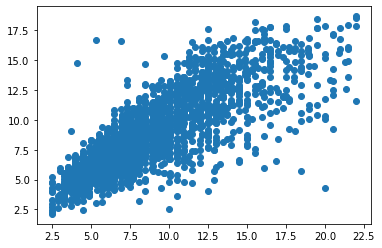

In [52]:
plt.scatter(test.iloc[:,0],predicts)

In [53]:
train.dtypes

fare_amount          float64
distance             float64
passenger_count_1      uint8
passenger_count_2      uint8
passenger_count_3      uint8
passenger_count_4      uint8
passenger_count_5      uint8
passenger_count_6      uint8
hour_0                 uint8
hour_1                 uint8
hour_2                 uint8
hour_3                 uint8
hour_4                 uint8
hour_5                 uint8
hour_6                 uint8
hour_7                 uint8
hour_8                 uint8
hour_9                 uint8
hour_10                uint8
hour_11                uint8
hour_12                uint8
hour_13                uint8
hour_14                uint8
hour_15                uint8
hour_16                uint8
hour_17                uint8
hour_18                uint8
hour_19                uint8
hour_20                uint8
hour_21                uint8
hour_22                uint8
hour_23                uint8
year_2009              uint8
year_2010              uint8
year_2011     

In [54]:
#decision tree regressor

from sklearn.tree import DecisionTreeRegressor
fit_DT = DecisionTreeRegressor(max_depth=7).fit(train.iloc[:,1:39], train.iloc[:,0])


In [55]:
predictions_DT = fit_DT.predict(test.iloc[:,1:39])
MAPE(test.iloc[:,0], predictions_DT)
RMSE(test.iloc[:,0], predictions_DT)
r2_score(test.iloc[:,0], predictions_DT)

19.089814895207887
2.2235975795005323


0.6360452832047365

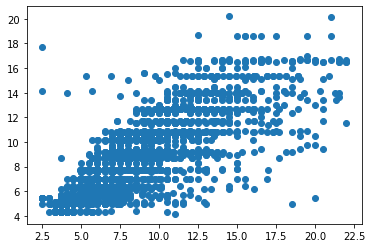

In [56]:
plt.scatter(test.iloc[:,0],predictions_DT)
#plt.plot([test.iloc[:0].min(), test.iloc[:0].max()], [test.iloc[:0].min(), test.iloc[:0].max()], 'k--', lw=4)
plt.show()

In [57]:
predictions_DT

array([ 6.36029412, 10.16738351,  5.13802817, ..., 11.72982456,
        5.67422512,  6.95392157])

In [58]:
test.iloc[:,0]

7829      5.5
15249    10.5
1873      5.3
4282      5.0
11291     4.0
12751    10.5
14642     7.3
957       5.3
15085     9.7
7126      4.9
7973      8.5
4608     10.0
3813      6.5
6614     12.0
13908    16.0
15202     7.5
306      19.0
13875     4.5
868       4.9
15800    12.0
10216    18.5
11715     8.0
776      12.9
10772     3.3
4351      7.7
15049     4.0
4975      5.7
13253     7.0
12981     6.1
3635     10.5
         ... 
5983      8.5
6395     11.3
12320     6.0
8439     10.1
15144    10.5
7314      8.5
9213      7.7
5455      5.3
15050     9.3
2007     15.5
13960     7.7
4786     10.5
14468    15.5
6688      7.0
3603     12.5
4556     12.5
4711      7.0
6198      4.6
14075     8.9
6594      4.0
7101     15.5
15120     6.5
3177     17.7
13391     4.5
10106    18.0
14825    19.0
5156      7.7
2401     11.3
14864     5.3
8476      6.9
Name: fare_amount, Length: 2691, dtype: float64

In [59]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(train.iloc[:,1:39],train.iloc[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [60]:
fare_rf_pred=regressor.predict(test.iloc[:,1:39])
MAPE(test.iloc[:,0], fare_rf_pred)
rmse=ny.sqrt(mean_squared_error(fare_rf_pred,test.iloc[:,0]))
print(rmse)
r2_score(test.iloc[:,0], fare_rf_pred)

19.8035611326351
2.2677227175388457


0.621457306146028

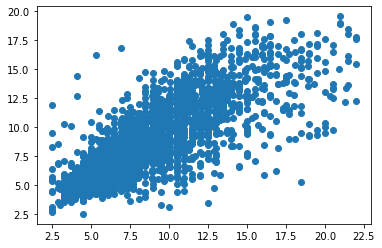

In [61]:
plt.scatter(test.iloc[:,0],fare_rf_pred)

In [62]:
cab_train

,fare_amount,passenger_count,hour,year,distance
0,4.5,1,17,2009,1.030765
2,5.7,2,1,2011,1.389527
3,7.7,1,5,2012,2.799274
4,5.3,1,8,2010,1.999160
5,12.1,1,10,2011,3.787244
6,7.5,1,21,2012,1.555809
7,16.5,1,17,2012,4.155450
9,8.9,2,1,2009,2.849631
10,5.3,1,8,2012,1.374579
12,4.1,2,1,2009,0.717769


In [63]:
#test data
cab_test=pd.read_csv("cabtest.csv")
cab_test.isna().sum()
cab_test
cab_test['pickup_datetime']=pd.to_datetime(cab_test['pickup_datetime'])

In [64]:
cab_test['month']=cab_test['pickup_datetime'].apply(lambda time:time.month)
cab_test['hour']=cab_test['pickup_datetime'].apply(lambda time:hourmin(time))
def hour24(hour):
    if(hour==24):
        hr=0
    else:
        hr=hour
    return hr
      
cab_test['hour']=cab_test['hour'].apply(lambda hour:hour24(hour))
cab_test['year']=cab_test['pickup_datetime'].apply(lambda time:time.year)
cab_test['distance']=cab_test.apply(lambda x:great_circle((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).km,axis=1)
cab_test['pickup_datetime']=pd.to_datetime(cab_test['pickup_datetime'])

In [65]:
cab_test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
month                              int64
hour                               int64
year                               int64
distance                         float64
dtype: object

In [66]:
cab_test=cab_test.drop(['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','month'],axis=1)


In [67]:
cab_test['year']=cab_test['year'].astype('category')
cab_test['passenger_count']=cab_test['passenger_count'].astype('category')
cab_test['hour']=cab_test['hour'].astype('category')

In [68]:
cabtest=pd.get_dummies(cab_test)
cabtest


,distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,hour_0,hour_1,hour_2,...,hour_21,hour_22,hour_23,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2.323263,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.425356,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.618629,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.961035,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,5.387309,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,3.222553,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,0.929603,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,21.540132,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,3.873967,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1.099795,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
predictions_test = model.predict(cabtest)
predictions_test.mean()

10.9571809108206

In [70]:
predictions_test

0       10.133701
1       10.351060
2        4.677043
3        7.321702
4       14.616316
5       10.007502
6        5.339114
7       49.219400
8       11.607733
9        7.399410
10       9.992332
11      15.318076
12       4.325974
13       6.354581
14       7.914871
15      13.474487
16       4.545948
17       9.298592
18       5.571300
19       4.819408
20       7.451289
21       9.267034
22       7.853852
23       9.122439
24      17.379708
25       7.462634
26      35.533525
27      25.146712
28       7.511265
29      15.073228
          ...    
9884    36.509555
9885    14.978603
9886    20.025489
9887     7.898488
9888     4.320190
9889     9.382423
9890    10.589279
9891    16.993938
9892    10.601584
9893    14.401926
9894    10.923068
9895    23.482113
9896     9.425938
9897    15.922259
9898     6.310491
9899    16.307501
9900     8.724336
9901     8.516739
9902    12.647749
9903    10.202562
9904    36.901153
9905    25.239490
9906     5.149278
9907    26.393441
9908     8

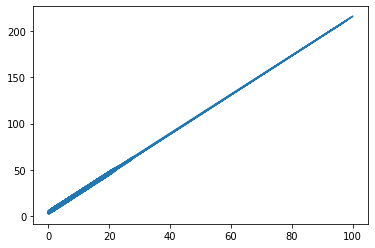

In [71]:
x=cab_test['distance']
y=predictions_test
plt.plot(x,y)
plt.xlabel='distance'
plt.ylabel='fare'
plt.show()

In [74]:
predictions_test.to_csv("fareson test.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
